In [ ]:
# Install required packages if not already installed
!pip install -q svgwrite
!pip install -q opencv-python-headless
!pip install -q numpy
!pip install -q Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image, ImageOps
import svgwrite
from google.colab import files
from IPython.display import display, Image as IPImage, SVG

In [ ]:
def upload_image():
    """Upload an image from local computer to Colab"""
    print("Please upload an image file (PNG, JPG, etc.)...")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    print(f"Successfully uploaded {filename}")
    return filename

#default threshold1=50, threshold2=150, blur_ksize=(3, 3)) blur must be odd numbers.
def convert_to_line_art(image_path, threshold1=80, threshold2=150, blur_ksize=(3, 3)):

    """Convert an image to line art using edge detection"""
    # Load the image
    image = Image.open(image_path).convert("RGB")

    # Convert to grayscale
    gray_image = ImageOps.grayscale(image)

    # Convert to numpy array for edge detection
    img_array = np.array(gray_image)

    # Apply Gaussian blur
    blurred_img = cv2.GaussianBlur(img_array, blur_ksize, 0)

    # Use Canny edge detection to create line art effect
    edges = cv2.Canny(blurred_img, threshold1=threshold1, threshold2=threshold2)

    # Invert the image to make the edges black on a white background
    inverted_edges = cv2.bitwise_not(edges)

    # Convert the edges back to an image
    line_art_image = Image.fromarray(inverted_edges)

    # Save the resulting line drawing
    line_art_path = os.path.splitext(image_path)[0] + "_line_art.png"
    line_art_image.save(line_art_path)

    return line_art_path

def convert_to_svg(line_art_path, min_contour_length=5):
    """Convert line art to SVG"""
    # Load line art image
    line_art_img = cv2.imread(line_art_path, cv2.IMREAD_GRAYSCALE)

    # Thresholding to get binary image
    _, binary_img = cv2.threshold(line_art_img, 128, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binary_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Create SVG drawing
    height, width = binary_img.shape
    svg_file_path = os.path.splitext(line_art_path)[0] + ".svg"
    dwg = svgwrite.Drawing(svg_file_path, profile='tiny', size=(width, height))

    # Draw contours to SVG
    for contour in contours:
        if len(contour) > min_contour_length:  # Filter out very small contours
            # Convert points to the format SVG expects
            points = [(float(point[0][0]), float(point[0][1])) for point in contour]
            dwg.add(dwg.polyline(points, stroke='black', fill='none', stroke_width=1))

    # Save SVG file
    dwg.save()

    return svg_file_path

def png_to_svg_pipeline():
    """Complete pipeline from PNG image upload to SVG conversion"""
    # Step 1: Upload image
    image_path = upload_image()

    # Step 2: Convert to line art
    print("Converting to line art...")
    line_art_path = convert_to_line_art(image_path)

    # Display the line art
    print("Line art result:")
    display(IPImage(line_art_path))

    # Step 3: Convert to SVG
    print("Converting to SVG...")
    svg_path = convert_to_svg(line_art_path)

    # Step 4: Display and download results
    print("SVG conversion complete!")
    display(SVG(svg_path))

    # Download the resulting files
    print("Downloading results...")
    #files.download(line_art_path) #PNGもダウンロードしたければこれをON
    files.download(svg_path)

    return line_art_path, svg_path


Please upload an image file (PNG, JPG, etc.)...


Saving u4559454679_oriental_brush_painting_lotus_flowers_and_rabbit__77eef16a-1017-4efb-8b9d-278638166166_2.png to u4559454679_oriental_brush_painting_lotus_flowers_and_rabbit__77eef16a-1017-4efb-8b9d-278638166166_2 (2).png
Successfully uploaded u4559454679_oriental_brush_painting_lotus_flowers_and_rabbit__77eef16a-1017-4efb-8b9d-278638166166_2 (2).png
Converting to line art...
Line art result:


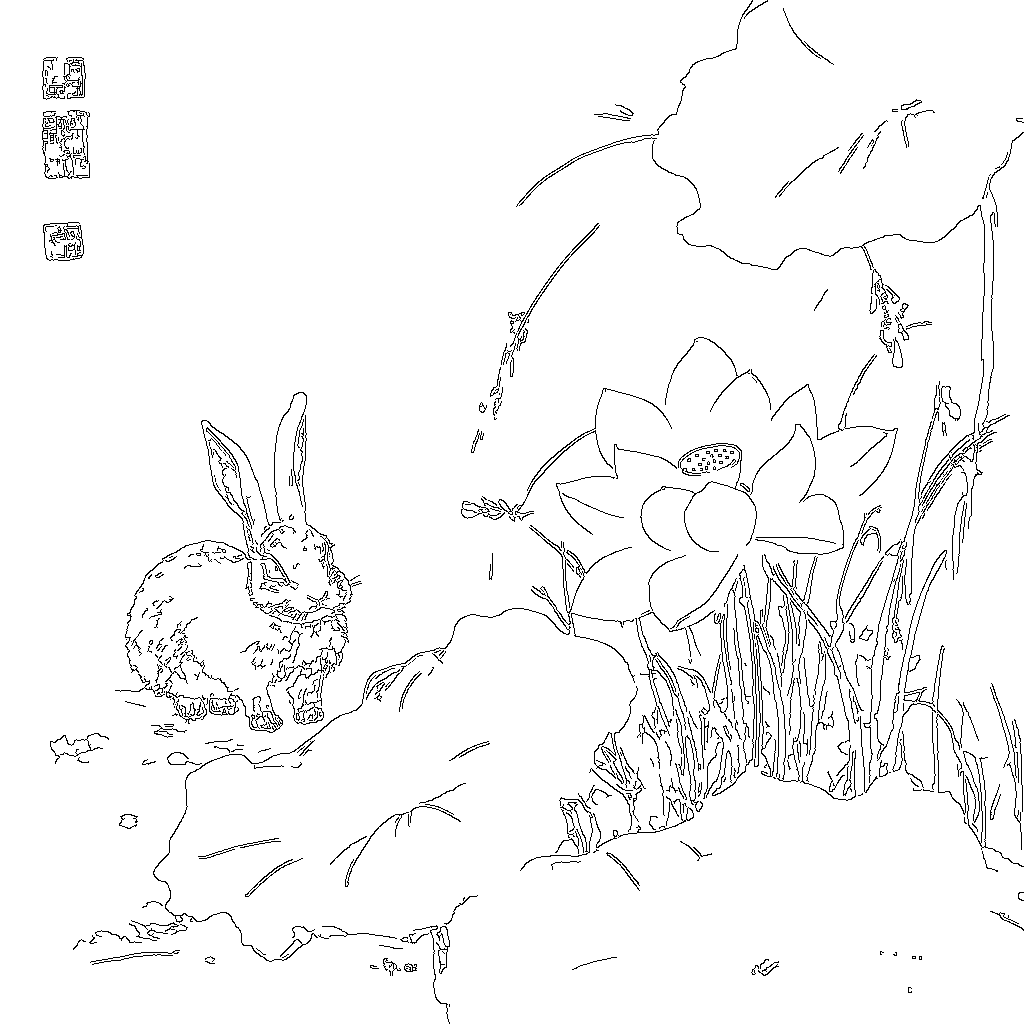

Converting to SVG...
SVG conversion complete!


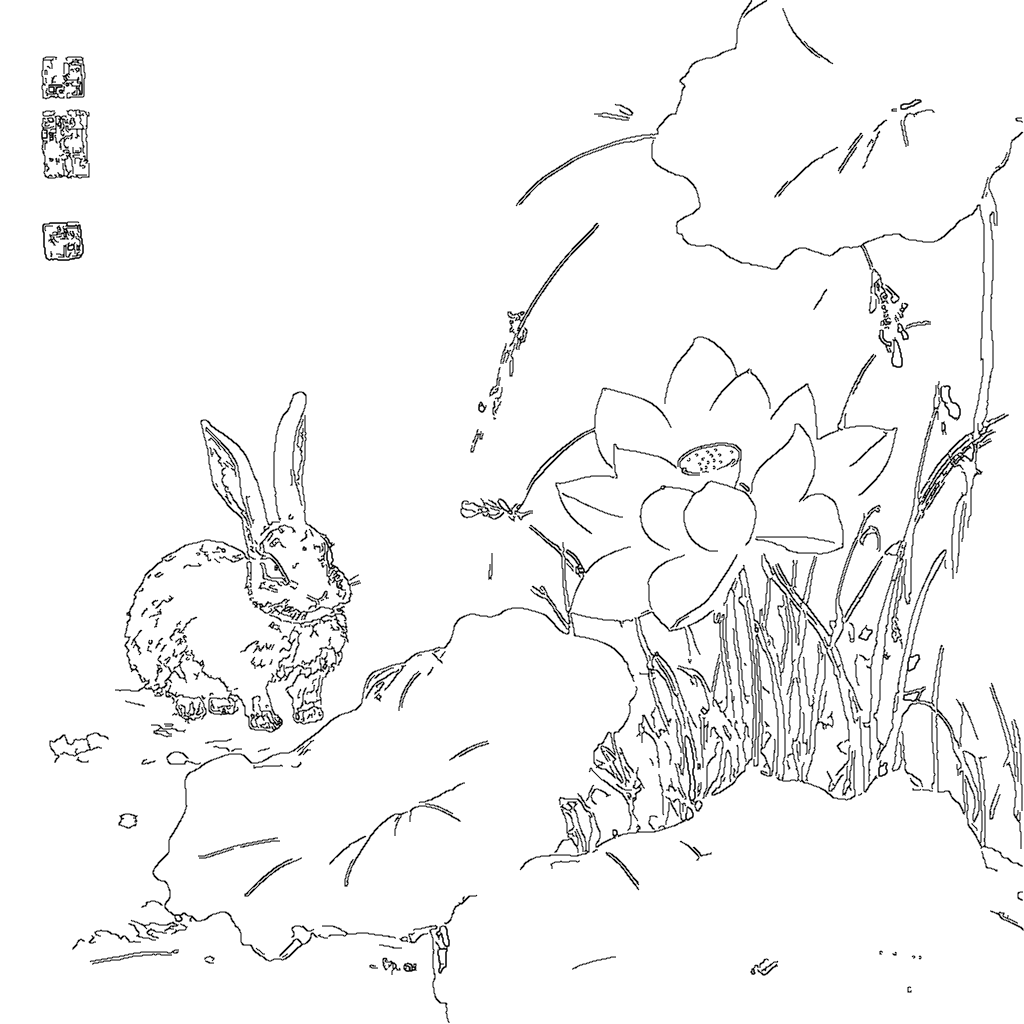

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Execute the pipeline
line_art_path, svg_path = png_to_svg_pipeline()